# 기초데이터과학 (01분반)

## 06-1. 데이터 정제

### Acknowledgement
#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음

- 쉽게 배우는 파이썬 데이터 분석. 이지스 퍼블리싱
- 파이썬 라이브러리를 활용한 데이터 분석. 한빛미디어

### 데이터 정제 (Data cleansing)
- 데이터에 존재하는 결측값이나 이상값 등을 처리하여 데이터의 신뢰도를 높이고 데이터 분석에 사용될 수 있도록 하는 작업
- 데이터 분석 전에 필요한 데이터 전처리 과정 중 하나

#### 데이터 오류 원인
- 결측값/결측치 (missing value)
  - 데이터가 입력되지 않고 누락된 값, 비어 있는 값
  - NaN, Na, Null, None 등으로 표현
  - 결측치가 많으면 데이터 분석 시 함수가 적용되지 않거나 분석 결과가 왜곡되는 문제 발생
- 잡음 (noise)
  - 실제는 입력되지 않았지만 입력되었다고 잘못 판단된 값
- 이상값/이상치 (outlier)
  - 데이터의 정상 범위에서 크게 벗어난 아주 크거나 작은 값
  - 데이터 수집 과정에서 발생하는 오류 때문에 데이터에 이상치가 포함될 수 있고 이를 그대로 분석에 사용할 경우 결과가 왜곡될 수 있음

#### 데이터 정제 방법
- 삭제: 정제가 필요한 데이터의 부분/전체 삭제
- 대체: 오류 데이터를 평균, 최빈값, 중앙값 등으로 대체
- 예측값 삽입: 회귀식 등을 이용해 예측값을 삽입

##### 데이터 정제 시 유의점
- 데이터 정제 후 데이터 활용 시 데이터 혹은 데이터 분석 결과에 왜곡이 발생하지 않도록 세심한 고려가 필요

#### 결측치가 존재하는 예제 데이터 만들기
- 결측치: numpy의 numpy.nan 이용

In [1]:
# 예제 데이터 만들기
import pandas as pd
import numpy as np

test = pd.DataFrame({'id'      : [1, 2, 3, 4, 5, 6, 7],
                      'midterm' : [60, 80, 70, 90, 85, np.nan, 75],
                       'final' : [70, 83, 65, 95, 80, 90, np.nan]})

print(test)

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
5   6      NaN   90.0
6   7     75.0    NaN


#### 결측치 존재 여부 확인하기
- isnull(), isna(), notnull() 함수

In [2]:
print(test.isnull())

      id  midterm  final
0  False    False  False
1  False    False  False
2  False    False  False
3  False    False  False
4  False    False  False
5  False     True  False
6  False    False   True


In [3]:
print(test.isna())

      id  midterm  final
0  False    False  False
1  False    False  False
2  False    False  False
3  False    False  False
4  False    False  False
5  False     True  False
6  False    False   True


In [4]:
print(test.notnull())

     id  midterm  final
0  True     True   True
1  True     True   True
2  True     True   True
3  True     True   True
4  True     True   True
5  True    False   True
6  True     True  False


##### 결측치 개수 확인하기

In [11]:
print(test.isnull().sum())

id         0
midterm    1
final      1
dtype: int64


In [12]:
print(test.isna().sum())

id         0
midterm    1
final      1
dtype: int64


##### 결측치가 있는 데이터 행 확인하기

In [13]:
na = test['midterm'].isna() # midterm 컬럼에서 결측치가 있는 것은 True, 그렇지 않으면 False
print(na)

missing = test[na]
print(missing)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
Name: midterm, dtype: bool
   id  midterm  final
5   6      NaN   90.0


In [14]:
missing = test[test['final'].isna()]
print(missing)

   id  midterm  final
6   7     75.0    NaN


#### 결측치 제거하기
- dropna() 함수 이용

- pandas.DataFrame.dropna(axis=0, how='any', inplace=False, subset=None)
  - axis=0: 결측치를 포함한 행 삭제
  - axis=1: 결측치를 포함한 열 삭제
  - how='any': 결측치가 하나라도 포함되면 제거
  - how='all': 행 또는 열 모두가 결측치여야 제거
  - inplace=True: 원본 데이터에서 결측치 삭제
  - inplace=False: 원본은 그대로 두고 결측치가 삭제된 데이터프레임 반환
  - subset: 결측치를 제거할 변수(열)

In [15]:
d = test.dropna() # 기본값이 axis=0, how='any'이므로 결측치가 하나라도 있는 행은 모두 삭제된 데이터프레임 반환
print(d) 

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0


In [16]:
print(test.dropna(how='all')) # axis=0, how='all'이므로 행의 모두가 결측치여야 제거되므로 행의 하나의 변수만 NaN인 행은 모두 남아 있음

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
5   6      NaN   90.0
6   7     75.0    NaN


In [13]:
print(test.dropna(axis=1)) # axis=1, how='any'이므로 결측치가 하나라도 있는 열은 모두 삭제됨

,id
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [17]:
print(test.dropna(subset=['final'])) # final 변수에서 결측치가 있는 행만 삭제됨

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
5   6      NaN   90.0


In [18]:
print(test.dropna(subset=['midterm'])) # midterm 변수에서 결측치가 있는 행만 삭제됨

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
6   7     75.0    NaN


In [19]:
print(test.dropna(subset=['midterm', 'final'])) # midterm 변수와 final 변수에서 결측치가 있는 행 삭제

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0


#### 결측치 대체하기
- 데이터가 크고 결측치가 얼마 없을 때는 결측치를 제거하고 분석하더라도 큰 무리가 없음
- 데이터가 작고 결측치가 많을 때는 결측치를 제거하면 너무 많은 데이터가 손실되어 분석 결과가 왜곡될 수 있음
- 이러한 문제를 보완하기 위해 결측치를 다른 값으로 채워 넣는 결측치 대체 방법을 사용함

##### 결측치 대체 방법
- 평균값이나 최빈값 같은 대표값을 구해 모든 결측치를 하나의 값으로 일괄 대체하는 방법
- 통계 분석 기법으로 결측치의 예측값을 추정해 대체하는 방법

##### 평균값으로 결측치 대체하기
- fillna() 함수 이용

In [20]:
print(test)

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
5   6      NaN   90.0
6   7     75.0    NaN


In [21]:
# midterm 변수의 평균값 계산
mid_mean = test['midterm'].mean() # mean(), sum() 등 수치 연산 함수는 결측치가 있으면 자동으로 제외하고 연산하는 기능이 있음
print(mid_mean)

76.66666666666667


In [22]:
# midterm 변수의 평균값인 76.7로 NaN 값을 대체
test['midterm'] = test['midterm'].fillna(76.7) # midterm이 NaN이면 76.7로 대체

print(test)

   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
5   6     76.7   90.0
6   7     75.0    NaN


In [23]:
print(test['midterm'].isna().sum()) # midterm 변수의 결측치 값의 개수가 0인 것을 확인할 수 있음

0


In [24]:
# final 변수의 결측치를 final 변수의 평균값으로 대체하기

f_mean = test['final'].mean() 
print(f_mean)

test['final'] = test['final'].fillna(f_mean)
print(test)

80.5
   id  midterm  final
0   1     60.0   70.0
1   2     80.0   83.0
2   3     70.0   65.0
3   4     90.0   95.0
4   5     85.0   80.0
5   6     76.7   90.0
6   7     75.0   80.5


#### 연습문제
- mpg 데이터에 결측치를 추가하여 결측치 확인과 제거 연습을 해보자.
  - mpg 데이터는 미국 환경 보호국에서 공개한 데이터로 1999~2008년 미국에 출시된 자동차 234 종의 정보를 담고 있음


In [26]:
mpg = pd.read_csv('mpg.csv')

print(mpg.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


In [27]:
# mpg 데이터의 결측치 개수 확인
print(mpg.isna().sum())

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64


In [29]:
# 결측치 추가하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan # mpg 데이터의 인덱스 64, 123, 130, 152, 211 행의 hwy 변수의 값을 NaN으로 변경

In [30]:
print(mpg[mpg['hwy'].isna()])

    manufacturer                model  displ  year  cyl       trans drv  cty  \
64         dodge  ram 1500 pickup 4wd    4.7  2008    8  manual(m6)   4   12   
123         jeep   grand cherokee 4wd    3.7  2008    6    auto(l5)   4   15   
130   land rover          range rover    4.0  1999    8    auto(l4)   4   11   
152       nissan       pathfinder 4wd    4.0  2008    6    auto(l5)   4   14   
211   volkswagen                  gti    2.8  1999    6  manual(m5)   f   17   

     hwy fl category  
64   NaN  r   pickup  
123  NaN  r      suv  
130  NaN  p      suv  
152  NaN  p      suv  
211  NaN  r  compact  


1. drv(구동 방식) 별로 hwy(고속도로 연비) 평균이 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. drv 변수와 hwy 변수에 결측치가 몇 개 있는지 확인해보세요.

2. dropna() 함수를 이용해 hwy 변수의 결측치를 제거하고, groupby() 함수와 agg() 함수를 이용하여 어떤 구동 방식(drv)이 고속도로 연비(hwy) 평균이 높은지 알아보세요.

#### 이상치 정제하기
- 이상치 (anomaly): 정상 범위에서 크게 벗어난 값 혹은 논리적으로 존재할 수 없는 값
- 이상치 정제 방법
  - 이상치 확인
  - 이상치를 결측 처리
  - 결측치 제거 혹은 대체

#### 이상치 제거하기 - 논리적으로 존재할 수 없는 값
##### 존재할 수 없는 값이 존재하는 예제 데이터 만들기

In [31]:
# 예제 데이터 만들기
import pandas as pd
import numpy as np

test = pd.DataFrame({'id'      : [1, 2, 300, 4, 5, 6, 7],
                      'midterm' : [60, -10, 70, 90, 85, 1000, 75],
                       'final' : [70, 83, 65, 95, 80, 90, 9000]})

print(test)

    id  midterm  final
0    1       60     70
1    2      -10     83
2  300       70     65
3    4       90     95
4    5       85     80
5    6     1000     90
6    7       75   9000


- 가정
  - 학생 수가 10명이어서 id는 1부터 10까지만 존재한다.
  - 점수는 100점 만점이고 0부터 100까지만 나올 수 있다.

##### 이상치 확인하기
- df.value_counts() 함수를 이용해 빈도표를 만들어 확인

In [32]:
print(test['id'].value_counts()) # id 열의 각 값의 개수를 계산

id
1      1
2      1
300    1
4      1
5      1
6      1
7      1
Name: count, dtype: int64


In [33]:
print(test['id'].value_counts().sort_index()) # sort_index() 함수를 사용하면 인덱스 열을 기준으로 정렬

id
1      1
2      1
4      1
5      1
6      1
7      1
300    1
Name: count, dtype: int64


In [35]:
print(test['midterm'].value_counts().sort_index()) # midterm 열의 각 값의 개수를 계산하고 midterm 값의 오름차순으로 정렬

midterm
-10      1
 60      1
 70      1
 75      1
 85      1
 90      1
 1000    1
Name: count, dtype: int64


In [5]:
print(test['final'].value_counts().sort_index()) # final 열의 각 값의 개수를 계산하고 final 값의 오름차순으로 정렬

final
65      1
70      1
80      1
83      1
90      1
95      1
9000    1
Name: count, dtype: int64

- 위의 결과에서 id에 존재할 수 없는 값인 300이 하나 존재하고, 
- midterm에 존재할 수 없는 -10, 1000이 하나씩 존재하고, 
- final에 존재할 수 없는 9000이 하나 존재함을 알 수 있음

##### 결측 처리하기
- 변수에 이상치가 들어 있음을 확인하면 이상치를 결측치로 바꿈
- np.where() 함수를 이용하여 이상치일 경우 NaN을 값으로 할당

In [36]:
test['id'] = np.where(test['id'] == 300, np.nan, test['id']) # id 값이 300이면 nan으로 값을 할당하고 그렇지 않으면 원래 id 값을 할당
print(test)

    id  midterm  final
0  1.0       60     70
1  2.0      -10     83
2  NaN       70     65
3  4.0       90     95
4  5.0       85     80
5  6.0     1000     90
6  7.0       75   9000


In [37]:
# midterm 값이 100보다 크거나 0보다 작으면 nan 값으로 할당, 그렇지 않으면 원래 값을 할당
test['midterm'] = np.where(test['midterm'] > 100, np.nan, test['midterm'])
test['midterm'] = np.where(test['midterm'] < 0, np.nan, test['midterm'])

# final 값이 100보다 크면 nan 값으로 할당, 그렇지 않으면 원래 값을 할당
test['final'] = np.where(test['final'] > 100, np.nan, test['final'])

print(test)

    id  midterm  final
0  1.0     60.0   70.0
1  2.0      NaN   83.0
2  NaN     70.0   65.0
3  4.0     90.0   95.0
4  5.0     85.0   80.0
5  6.0      NaN   90.0
6  7.0     75.0    NaN


- df.dropna() 함수를 이용하여 결측치를 제거

In [38]:
clean_test = test.dropna() # 결측치가 하나라도 있는 행은 삭제

print(clean_test)

    id  midterm  final
0  1.0     60.0   70.0
3  4.0     90.0   95.0
4  5.0     85.0   80.0


##### __참고__
- np.where() 함수는 문자열 값과 NaN을 동시에 반환할 수 없음

In [39]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]}) # 변수 x1에 4개 값이 할당된 데이터 프레임 생성
print(df)

   x1
0   1
1   1
2   2
3   2


In [40]:
# 위 데이터 프레임에 x2 변수를 추가하는데, 그 값으로는 x1 값이 1이면 문자열 'a'를 할당하고 그렇지 않으면 NaN 할당
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan) 
print(df)

   x1   x2
0   1    a
1   1    a
2   2  nan
3   2  nan


In [41]:
print(df.isna()) # isna() 함수 결과 모두 False로 결측치가 없는 것으로 나옴. 그 이유는 np.nan을 할당했지만 문자열 'nan'이 할당되어서 그러함

      x1     x2
0  False  False
1  False  False
2  False  False
3  False  False


- 위와 같은 문제를 해결하는 방법
  - np.where() 함수를 결측치로 만들 값을 우선 문자열 값으로 부여
  - df.replace() 함수를 이용해 결측치로 만들 문자열 값을 np.nan으로 바꿈

In [42]:
df['x2'] =np.where(df['x1'] == 1, 'a', 'etc') # x1 값이 1이면 'a', 그렇지 않으면 'etc'로 x2 변수에 할당

df['x2'] = df['x2'].replace('etc', np.nan) # 'etc' 값을 np.nan으로 대체

print(df)

   x1   x2
0   1    a
1   1    a
2   2  NaN
3   2  NaN


In [43]:
print(df.isna()) # x2에서 NaN 해당하는 값이 True로 나오는 것을 확인할 수 있음

      x1     x2
0  False  False
1  False  False
2  False   True
3  False   True


#### 이상치 제거하기 - 극단적인 값
- 논리적으로 존재할 수 있지만 극단적으로 크거나 작은 값을 극단치(outlier)라고 함
  - 예를 들어, 몸무게 변수에 200kg 이상의 값이 있다면, 존재할 가능성은 있지만 매우 드문 경우이므로 극단치라고 볼 수 있음
  - 데이터에 극단치가 있으면 분석 결과가 왜곡될 수 있으므로 분석하기 전에 제거
- 극단치를 제거하려면 먼저 어디까지를 정상 범위로 볼 것인지 정해야 함
  - 쉬운 방법은 논리적으로 판단해 정하는 것. 예를 들어 성인의 몸무게가 40~150kg을 벗어나는 경우는 매우 드물다고 판단하고 이 범위를 벗어나면 극단치로 간주
  - 두번째 방법은 통계적인 기준을 이용하는 것. 예를 들어 상하위 0.3% 또는 +3 혹은 -3 표준편차에 해당할 만큼 극단적으로 크거나 작으면 극단치로 간주

##### 상자 그림(box plot)으로 극단치 기준 정하기
- 상자 그림: 데이터의 분포를 직사각형의 상자 모양으로 표현한 그래프
  - 상자 그림을 보면 데이터의 분포를 한눈에 파악하기 쉬움
  - 상자 그림은 중심에서 멀리 떨어진 값을 점으로 표현하는데, 이를 이용해 극단치의 기준을 정할 수 있음

![상자 그림](https://www.researchgate.net/publication/368829929/figure/fig3/AS:11431281122615330@1677468002568/Box-plot-and-probability-density-function-of-a-normal-distribution_W640.jpg)

##### 1. 상자 그림 살펴보기
- mpg 데이터의 hwy 변수로 상자 그림 생성

<Axes: ylabel='hwy'>

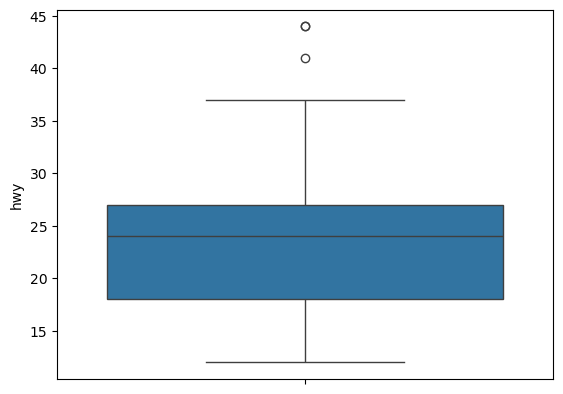

In [44]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns # seaborn 패키지를 이용하여 시각화하는 것을 추후 수업에서 다룰 것임
sns.boxplot(data = mpg, y = 'hwy')


- 상자 아래 세로선 (아랫수염)
  - 하위 0~25% 내에 해당하는 값
- 상자 밑면 (1사분위수: Q1)
  - 하위 25% 위치 값
- 상자 내 굵은 선 (2사분위수: Q2)
  - 하위 50% 위치 값 (중앙값)
- 상자 윗면 (3사분위수: Q3)
  - 하위 75% 위치 값
- 상자 위 세로선 (윗수염)
  - 하위 75~100% 내에 해당하는 값
- 상자 밖 가로선 (극단치 경계)
  - Q1, Q3 밖 1.5 IQR 내 최대값
  - IQR (Inter-Quartile Range): 1사분위수와 3사분위수의 거리
- 상자 밖 점 표식 (극단치)
  - Q1, Q3 밖 1.5 IQR을 벗어난 값

##### 2. 극단치 기준값 구하기
- 1사분위수, 3사분위수 구하기
  - df.quantile() 함수 이용

In [45]:
pct25 = mpg['hwy'].quantile(0.25) # 1사분위수
print(pct25)

18.0


In [46]:
pct75 = mpg['hwy'].quantile(0.75) # 3사분위수
print(pct75)

27.0


- IQR 구하기

In [47]:
iqr = pct75 - pct25
print(iqr)

9.0


- 하한, 상한 구하기
  - 하한: 1사분위수보다 IQR의 1.5배만큼 더 작은 값
  - 상한: 3사분위수보다 IQR의 1.5배만큼 더 큰 값

In [48]:
low_limit = pct25 - 1.5 * iqr # 하한

print(low_limit)

4.5


In [49]:
up_limit = pct75 + 1.5 * iqr # 상한

print(up_limit)

40.5


##### 3. 극단치를 결측 처리하기

In [50]:
# hwy 컬럼 값이 하한 4.5보다 작거나, 상한 40.5보다 크면 NaN 할당, 그렇지 않으면 원래 값 할당
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
print(mpg['hwy'].isna().sum())

3


##### 4. 결측치 제거하고 분석하기

In [51]:
# 결측치 제거
# drv 별 분리
# hwy 평균 구하기
d = mpg.dropna(subset = ['hwy']) \
    .groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))  

print(d)

      mean_hwy
drv           
4    19.174757
f    27.728155
r    21.000000


In [52]:
# 결측치 제거 전 원 데이터의 경우 분석 결과 
mpg = pd.read_csv('mpg.csv')
d2 = mpg.groupby('drv') \
        .agg(mean_hwy = ('hwy', 'mean')) 

print(d2)

      mean_hwy
drv           
4    19.174757
f    28.160377
r    21.000000


#### 연습문제
- mpg 데이터에 이상치를 추가하여 연습을 해보자.
  - drv(구동 방식) 변수의 값은 4(사륜구동), f(전륜구동), r(후륜구동) 세 종류임
  - 몇 개의 행에 존재할 수 없는 값 k를 할당하고 cty(도시 연비) 변수도 몇 개의 행에 극단적으로 크거나 작은 값을 할당하여 이상치 생성

In [53]:
mpg = pd.read_csv('mpg.csv')

print(mpg.describe())

            displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643
min      1.600000  1999.000000    4.000000    9.000000   12.000000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000
50%      3.300000  2003.500000    6.000000   17.000000   24.000000
75%      4.600000  2008.000000    8.000000   19.000000   27.000000
max      7.000000  2008.000000    8.000000   35.000000   44.000000


In [54]:
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k' # 데이터의 9, 13, 57, 92 인덱스 행의 drv 변수 값을 'k'로 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42] # 데이터의 28, 42, 128, 202 인덱스 행의 cty 변수 값을 3, 4, 39, 42로 할당

print(mpg.loc[5:15, ['drv']])

   drv
5    f
6    f
7    4
8    4
9    k
10   4
11   4
12   4
13   k
14   4
15   4


##### 1. drv에 이상치가 있는 확인하시오. 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인하시오.

##### 2. 상자 그림을 이용해 cty에 이상치가 있는지 확인하시오. 상자 그림 기준으로 정상 범위를 벗어난 값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하시오.

##### 3. 두 변수의 이상치가 결측 처리되었으면, 결측치를 제거한 다음 drv 별로 cty 평균이 어떻게 나오는지 확인하시오. 